# Project 9 - First digits, Last digits

## Introduction

Numbers appear everywhere in around the world, especially in statistics and data. In this project, we took data sources and found just how frequently numbers (0-9) appear as first digits and last digits.

To help us find the first non-zero digit and last non-zero digit, two functions are defined. `fd(num)` takes a integer and finds the first non-zero digit. `ld(num)` takes a integer and finds the last non-zero digit.

In [1]:
# takes a number and returns the first non-zero integer, unless it is zero

def fd(num):
    if num == 0:           # if number is 0, return 0
        return 0
    num = abs(num)         # absolute value so ignore negative
    numString = str(num)   # makes it a string
    if numString.lower() == 'nan':   # null in one of the data returns 0
        return 0
    for n in numString:              # iterate through
        if n != '0' and n != '.':    # skips zeros and decimals to return first number in type int
            return int(n)

In [2]:
fd(-0.07)   # ignores negative, 0s and decimal left to right and hits 7

7

In [3]:
# takes a number and returns the last non-zero integer, unless it is zero

def ld(num):                            # same as fd but added reversed which reverses the string, so still left to right
    if num == 0:
        return 0
    numString = str(num)
    rnumString = reversed(numString)
    if numString.lower() == 'nan':
        return 0
    for n in rnumString:
        if n != '0' and n != '.':
            return int(n)
        

In [4]:
ld(-32.10)

1

In [5]:
ld(32.5)

5

In [6]:
import requests              # import requests and downloads data
url = 'https://jllottes.github.io/_downloads/82d80288a3d04c1d3fd267fda24ba301/NYSE_2016_03_25.csv'
with open('NYSE.csv','wb') as f:
    f.write(requests.get(url).content)

In [7]:
import pandas as pd

In [8]:
NYSE = pd.read_csv(url,skiprows=3)

In [9]:
NYSE

,Name,Symbol,Open,High,Low,Close,Net Chg,% Chg,Volume,52 Wk High,52 Wk Low,YTD % Chg
0,3D Systems,DDD,14.14,14.81,13.60,14.76,0.32,2.22,3240444,32.88,6.00,69.85
1,3M,MMM,163.68,164.54,163.05,164.46,0.19,0.12,1730167,167.70,134.00,9.17
2,58.com ADR,WUBA,56.25,56.76,55.28,56.48,-0.04,-0.07,518280,83.71,37.72,-14.37
3,500.com ADR,WBAI,16.46,17.18,16.04,16.88,0.26,1.56,378620,30.67,9.89,-16.02
4,A10 Networks,ATEN,5.85,5.91,5.77,5.87,-0.03,-0.51,126272,8.30,4.12,-10.52
...,...,...,...,...,...,...,...,...,...,...,...,...
2137,Zendesk,ZEN,19.50,19.60,18.98,19.52,-0.12,-0.61,595860,27.54,14.38,-26.17
2138,Zhaopin ADR,ZPIN,15.85,16.00,15.59,15.78,-0.09,-0.57,93009,17.66,11.65,3.00
2139,Zimmer Biomet Holdings,ZBH,103.58,104.31,103.07,103.74,-0.69,-0.66,850675,119.10,88.27,1.12
2140,Zoe's Kitchen,ZOES,37.65,39.00,37.09,38.48,0.71,1.88,154304,46.61,23.17,37.53


In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

We define these two functions `create_freq_column()` and `generateGraph()` to help us visualize the frequencies of digits that appear

In [11]:
def create_freq_column(source, column_title, function):          # takes a source (panda dataframe), title of column and 
    digitCounts = {}                                              # function fd or ld
    for i in range(len(source)):
        num = source[column_title].loc[i]                       # loops through number of rows in column
        first_int = function(num)                               # finds first or last digit using function provided
        if first_int not in digitCounts:                        # if not digit is not in dictionary already, add it
            digitCounts[first_int] = 1                          # and value = 1
        else:
            digitCounts[first_int] += 1                         # if it is there already, + 1 to value
    if 0 in digitCounts:                                        # if 0 is in the dictionary, pop the 0 out dont need
        digitCounts.pop(0)
    return digitCounts                                          # returns dictionary

In [12]:
def generateGraph(digitDictionary, string, place):       # takes a digit dictionary from create_freq_column() and 
    alist = []                                            # string for title, and place for label either first or last
    blist = []
    freqlist = []
    for digit in digitDictionary:                        # loops through dictionary provided and appends digits to alist
        alist.append(digit)
    alist = sorted(alist)                                # sorts a list from lowest to highest (1-9)
    for index in range(1,10):                            # loops through 1-9, calling the value representing each index
        blist.append(digitDictionary[index])             # appends to blist and freqlist is the b divided by sum of all b
    for b in blist:
        freqlist.append((b / sum(blist)))                # frequency percent

    bar_plot = plt.bar(alist, freqlist, width = 0.7, color = cm.spring(.5))    # plot bar
    plt.xticks(alist)

    plt.ylabel('First Digit Counts (in %)')
    plt.xlabel('{} Digit'.format(place))
    plt.title('{} Digit Frequencies'.format(string))

## Frequency of First and Last Digits in NYSE

In [13]:
openFD = create_freq_column(NYSE,'Open', fd)
openFD

{1: 638, 5: 190, 2: 366, 4: 211, 3: 280, 8: 100, 9: 83, 7: 124, 6: 150}

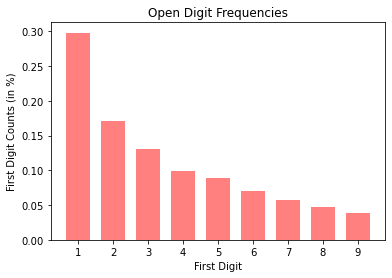

In [14]:
generateGraph(openFD, 'Open', 'First')

In [15]:
openLD = create_freq_column(NYSE,'Open', ld)
openLD

{4: 252, 8: 228, 5: 262, 6: 243, 2: 255, 9: 213, 7: 245, 1: 234, 3: 210}

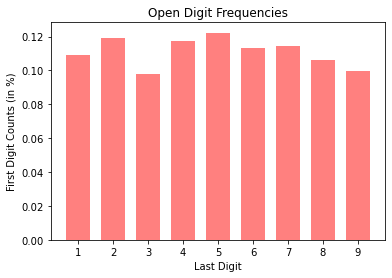

In [16]:
generateGraph(openLD, 'Open', 'Last')

In [17]:
highFD = create_freq_column(NYSE,'High', fd)
highFD

{1: 640, 5: 189, 2: 365, 4: 212, 3: 275, 8: 95, 9: 91, 7: 118, 6: 157}

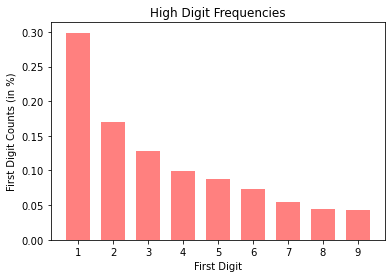

In [18]:
generateGraph(highFD, 'High', 'First')

In [19]:
highLD = create_freq_column(NYSE,'High', ld)
highLD

{1: 242, 4: 239, 6: 240, 8: 228, 3: 190, 9: 255, 5: 261, 7: 237, 2: 250}

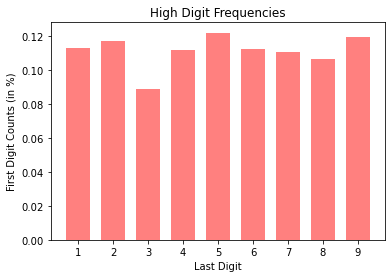

In [20]:
generateGraph(highLD, 'High', 'Last')

In [21]:
lowFD = create_freq_column(NYSE,'Low', fd)
lowFD

{1: 637, 5: 183, 2: 369, 4: 226, 3: 270, 8: 96, 9: 88, 7: 117, 6: 156}

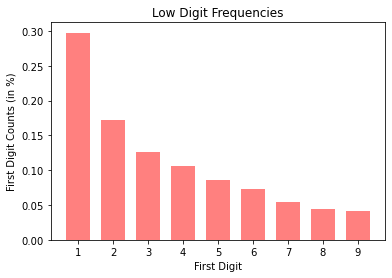

In [22]:
generateGraph(lowFD, 'Low', 'First')

In [23]:
lowLD = create_freq_column(NYSE,'Low', ld)
lowLD

{6: 220, 5: 307, 8: 234, 4: 248, 7: 222, 9: 193, 2: 261, 3: 221, 1: 236}

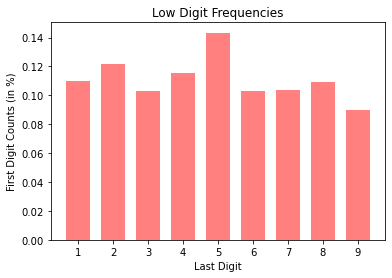

In [24]:
generateGraph(lowLD, 'Low', 'Last')

In [25]:
closeFD = create_freq_column(NYSE,'Close', fd)
closeFD

{1: 643, 5: 191, 2: 365, 4: 214, 3: 275, 8: 98, 9: 82, 7: 121, 6: 153}

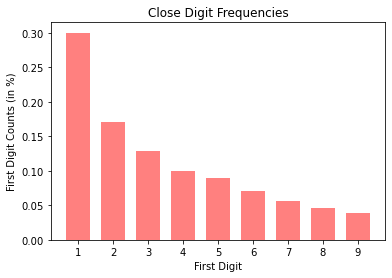

In [26]:
generateGraph(closeFD, 'Close', 'First')

In [27]:
closeLD = create_freq_column(NYSE,'Close', ld)
closeLD

{6: 256, 8: 263, 7: 234, 3: 196, 5: 246, 2: 243, 1: 207, 4: 261, 9: 236}

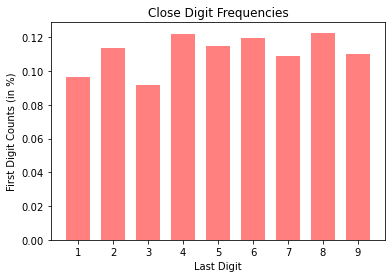

In [28]:
generateGraph(closeLD, 'Close', 'Last')

In [29]:
pChgFD = create_freq_column(NYSE,'% Chg', fd)
pChgFD

{2: 336, 1: 667, 7: 122, 5: 164, 9: 109, 8: 94, 4: 192, 6: 153, 3: 264}

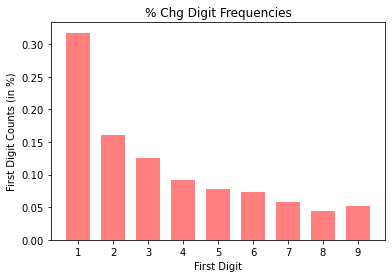

In [30]:
generateGraph(pChgFD, '% Chg', 'First')

In [31]:
pChgLD = create_freq_column(NYSE,'% Chg', ld)
pChgLD

{2: 249, 7: 228, 6: 245, 1: 228, 3: 237, 8: 214, 4: 229, 5: 242, 9: 229}

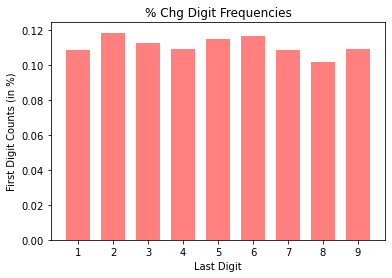

In [32]:
generateGraph(pChgLD, '% Chg', 'Last')

In [33]:
volumeFD = create_freq_column(NYSE,'Volume', fd)
volumeFD

{3: 274, 1: 602, 5: 189, 4: 212, 2: 381, 6: 150, 9: 108, 8: 116, 7: 110}

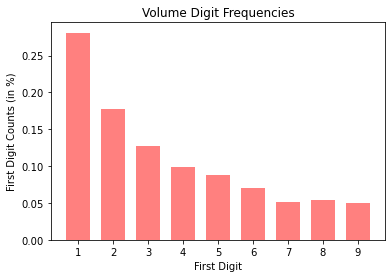

In [34]:
generateGraph(volumeFD, 'Volume', 'First')

In [35]:
volumeLD = create_freq_column(NYSE,'Volume', ld)
volumeLD

{4: 259, 7: 273, 8: 249, 2: 227, 6: 225, 3: 231, 1: 201, 5: 238, 9: 239}

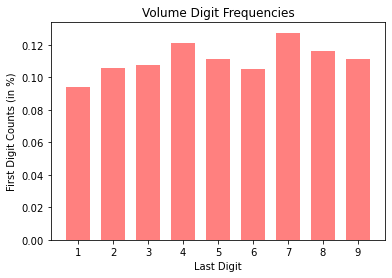

In [36]:
generateGraph(volumeLD, 'Volume', 'Last')

In [37]:
wkHFD = create_freq_column(NYSE,'52 Wk High', fd)
wkHFD

{3: 282, 1: 552, 8: 103, 4: 230, 2: 386, 5: 197, 7: 148, 6: 147, 9: 96}

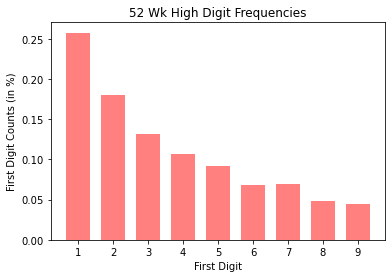

In [38]:
generateGraph(wkHFD, '52 Wk High', 'First')

In [39]:
wkHLD = create_freq_column(NYSE,'52 Wk High', ld)
wkHLD

{8: 248, 7: 228, 1: 196, 3: 228, 6: 203, 4: 242, 9: 293, 5: 307, 2: 196}

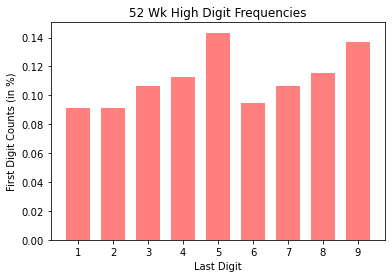

In [40]:
generateGraph(wkHLD, '52 Wk High', 'Last')

In [41]:
wkLFD = create_freq_column(NYSE,'52 Wk Low', fd)
wkLFD

{6: 126, 1: 607, 3: 301, 9: 100, 4: 218, 2: 378, 8: 115, 5: 178, 7: 118}

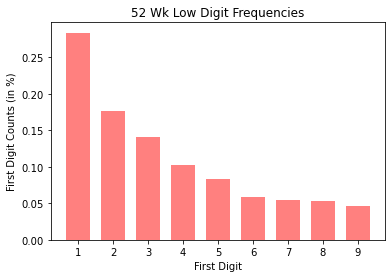

In [42]:
generateGraph(wkLFD, '52 Wk Low', 'First')

In [43]:
wkLLD = create_freq_column(NYSE,'52 Wk Low', ld)
wkLLD

{6: 241, 4: 222, 2: 235, 9: 221, 5: 283, 3: 232, 7: 213, 1: 250, 8: 244}

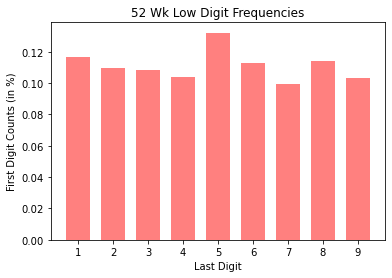

In [44]:
generateGraph(wkLLD, '52 Wk Low', 'Last')

In [45]:
ytdFD = create_freq_column(NYSE,'YTD % Chg', fd)
ytdFD

{6: 128, 9: 114, 1: 718, 3: 238, 5: 156, 2: 337, 8: 131, 7: 126, 4: 188}

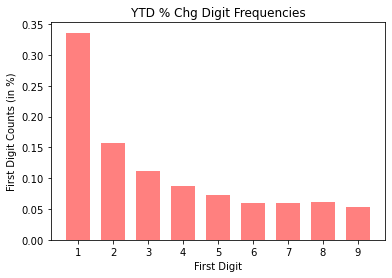

In [46]:
generateGraph(ytdFD, 'YTD % Chg', 'First')

In [47]:
ytdLD = create_freq_column(NYSE,'YTD % Chg', ld)
ytdLD

{5: 253, 7: 233, 2: 244, 8: 233, 1: 239, 6: 215, 3: 245, 9: 230, 4: 244}

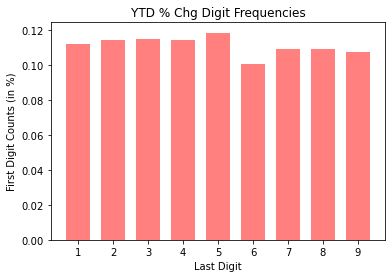

In [48]:
generateGraph(ytdLD, 'YTD % Chg', 'Last')

## Observations on NYSE

As we can observe from the multiple graphs, the highest first digit frequencies is 1 all the time, then it gradually lowers as the digit increases. Sometimes the frequency goes a tiny bit higher at around 8 as its first digit. We can see from the last digits frequencies are nearly equal to one another. I believe this might be the case since the last digit can vary a lot since the last digit is usually can be "ignored". For example, when you round up numbers you round on the last digit usually. The graphs are can be described as very similar in a way in terms of how it either decreases as the digits goes up usually on first digits and how it is nearly equal on last digits.

## Frequency of First and Last Digits in cAreas

In [49]:
caurl = 'https://jllottes.github.io/_downloads/0f06d32b6f3a7250f190cd627087c8b5/country_areas.csv'
with open('cAreas.csv','wb') as f:
    f.write(requests.get(caurl).content)

In [50]:
cAreas = pd.read_csv(caurl,skiprows=2)

In [51]:
cAreas

,Country Name,Country Code,Area (sq km),Area (sq miles)
0,Afghanistan,AFG,652860.0,252071
1,Albania,ALB,28750.0,11100
2,Algeria,DZA,2381740.0,919595
3,American Samoa,ASM,200.0,77
4,Andorra,AND,470.0,182
...,...,...,...,...
205,Virgin Islands (U.S.),VIR,350.0,135
206,West Bank and Gaza,PSE,6020.0,2324
207,Yemen,YEM,527970.0,203850
208,Zambia,ZMB,752610.0,290584


In [52]:
area_kmFD = create_freq_column(cAreas, 'Area (sq km)', fd)
area_kmFD

{6: 13, 2: 37, 4: 24, 1: 60, 7: 15, 8: 9, 3: 25, 5: 16, 9: 11}

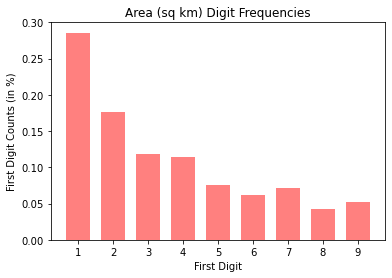

In [53]:
generateGraph(area_kmFD, 'Area (sq km)', 'First')

In [54]:
area_kmLD = create_freq_column(cAreas, 'Area (sq km)', ld)
area_kmLD

{6: 28, 5: 26, 4: 25, 2: 24, 7: 31, 8: 17, 9: 21, 3: 20, 1: 18}

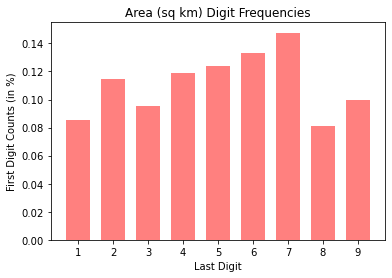

In [55]:
generateGraph(area_kmLD, 'Area (sq km)', 'Last')

In [56]:
area_mFD = create_freq_column(cAreas, 'Area (sq miles)', fd)
area_mFD

{2: 34, 1: 72, 9: 10, 7: 15, 4: 24, 3: 28, 5: 9, 8: 7, 6: 11}

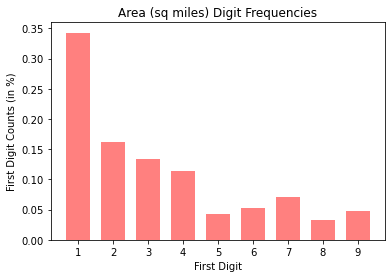

In [57]:
generateGraph(area_mFD, 'Area (sq miles)', 'First')

In [58]:
area_mLD = create_freq_column(cAreas, 'Area (sq miles)', ld)
area_mLD

{1: 25, 5: 21, 7: 26, 2: 22, 3: 31, 8: 18, 6: 21, 9: 23, 4: 23}

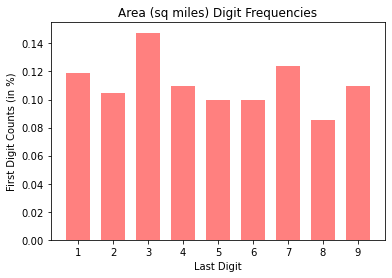

In [59]:
generateGraph(area_mLD, 'Area (sq miles)', 'Last')

## Frequencies of First and Last Digits on NYT

In [60]:
nyturl = 'https://jllottes.github.io/_downloads/7a14d4bc3565f1af04f4b5d90cfb6bfc/NYT_2010_06_01.txt'
with open('NYT.txt','wb') as f:
    f.write(requests.get(nyturl).content)

In [61]:
f = open("NYT.txt", "r")
NYT = f.read()
f.close()

In [62]:
NYT = NYT.split('------------')

In [63]:
NYT

['Federal Deposit Insurance Corp brokers sale of Puerto Rican banks Eurobank, R-G Premier Bank and Westernbank; banks respectively are bought by Oriental Financial Group, Scotiabank of Canada, and Banco Popular (M)\n\n',
 '\n \nPaul Sullivan Wealth Matters column discusses home security systems; photo (M)\n\n',
 '\n \nBucks blog on patients e-mailing doctors with medical questions (S)\n\n',
 '\n \nFloyd Norris Off the Charts column observes that for first time in 40 years, more people during 2007-9 downturn thought their own financial situation was going to get worse than thought it would improve; cites Conference Board chart of data from 1967 to 2010, which shows how Americans expected their income to fare in next six months (M)\n\n',
 '\n \nNate Chinen reviews concert by drummer Tomas Fujiwara and his band, Hook Up, at Jazz Gallery; photos (M)\n\n',
 '\n \nJason Zinoman reviews production of Crystal Skillman play The Vigil or the Guided Cradle, directed by John Hurley; photo (M)\n\n'

In [64]:
import re

In [65]:
def findNum(source, function):
    digitCounts = {}
    numberPattern = r'\d+'
    for string in source:
        numList = re.findall(numberPattern, string)
        if len(numList) != 0:
            for num in numList:
                first_int = function(int(num))
                if first_int not in digitCounts:
                    digitCounts[first_int] = 1
                else:
                    digitCounts[first_int] += 1
    if 0 in digitCounts:
        digitCounts.pop(0)
    return digitCounts

In [66]:
nytFD = findNum(NYT, fd)
nytFD

{4: 104, 2: 284, 9: 43, 1: 368, 3: 131, 6: 58, 5: 99, 8: 49, 7: 58}

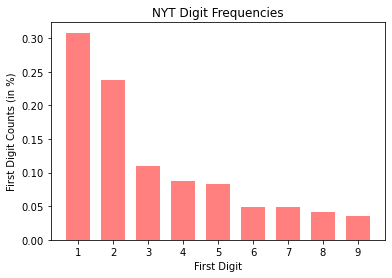

In [67]:
generateGraph(nytFD, 'NYT', 'First')

In [68]:
nytLD = findNum(NYT, ld)
nytLD

{4: 117, 7: 112, 9: 95, 1: 214, 2: 171, 6: 89, 8: 107, 3: 130, 5: 159}

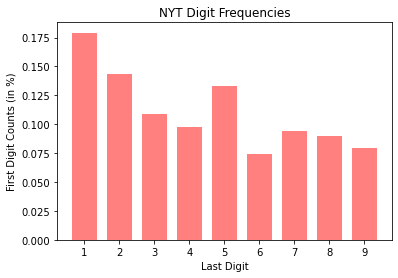

In [69]:
generateGraph(nytLD, 'NYT', 'Last')

## Observations on NYT Frequencies

Comparing the graphs of First and Last Digit frequencies for _New York Times_ and the other two sources, we can see that the First Digit frequency graphs is following roughly the same patterns. There is a slight divergence in _New York Times_ Last Digit frequency graph, but they are similar as well, all of them floating around similar numbers. There are only slight differences compared to the First Digits drastic declines.

## Conclusion

Based on the data sources downloaded and put into pandas dataframes, we can see that there is a obvious pattern for first digits. It starts at highest number 1, then the frequency drops usually as the number digit increases. There are certain flucuations, but most follows the same pattern of declining frequency. Last Digits, on the other hand, show them at close to equal, only having some slight difference in between them. This might be because since the last digit can vary a lot since the last digit is usually can be "ignored". For example, when you round up numbers you round on the last digit usually and that last digit disappears. It either goes up or down for the next.